<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Counting-Vocabulary-by-Selecting-Tokens-of-Interest" data-toc-modified-id="Counting-Vocabulary-by-Selecting-Tokens-of-Interest-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Counting Vocabulary by Selecting Tokens of Interest</a></span><ul class="toc-item"><li><span><a href="#Removing-Words-with-Non-alphabetic-Characters" data-toc-modified-id="Removing-Words-with-Non-alphabetic-Characters-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Removing Words with Non-alphabetic Characters</a></span></li><li><span><a href="#Removing-the-Most-and-Less-Frequent-Words" data-toc-modified-id="Removing-the-Most-and-Less-Frequent-Words-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Removing the Most and Less Frequent Words</a></span><ul class="toc-item"><li><span><a href="#Ignoring-Stopwords" data-toc-modified-id="Ignoring-Stopwords-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Ignoring Stopwords</a></span></li><li><span><a href="#Remove-Less-Frequent-Words" data-toc-modified-id="Remove-Less-Frequent-Words-1.2.2"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>Remove Less Frequent Words</a></span></li></ul></li></ul></li><li><span><a href="#Building-Vector-Representation" data-toc-modified-id="Building-Vector-Representation-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Building Vector Representation</a></span><ul class="toc-item"><li><span><a href="#Creating-Count-Vectors" data-toc-modified-id="Creating-Count-Vectors-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Creating Count Vectors</a></span></li><li><span><a href="#Creating-TF-IDF-Vectors" data-toc-modified-id="Creating-TF-IDF-Vectors-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Creating TF-IDF Vectors</a></span></li></ul></li><li><span><a href="#Saving-Pre-processed-Text-to-a-File" data-toc-modified-id="Saving-Pre-processed-Text-to-a-File-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Saving Pre-processed Text to a File</a></span></li><li><span><a href="#Extracting-Other-Features" data-toc-modified-id="Extracting-Other-Features-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Extracting Other Features</a></span><ul class="toc-item"><li><span><a href="#Extracting-Nouns-and-Verbs" data-toc-modified-id="Extracting-Nouns-and-Verbs-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Extracting Nouns and Verbs</a></span></li><li><span><a href="#Extracting-N-grams-and-Collocations" data-toc-modified-id="Extracting-N-grams-and-Collocations-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Extracting N-grams and Collocations</a></span></li></ul></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Conclusion</a></span></li><li><span><a href="#Reference-Reading-Materials" data-toc-modified-id="Reference-Reading-Materials-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Reference Reading Materials</a></span></li></ul></div>

# Exploring Pre-Processed text and Generating Features
One of the challenges of text analysis is to convert unstructured and semi-structured text into a structured representation. This must be done prior to carrying out any text analysis tasks. This chapter will show you 
how to put some of those basic steps discussed in the previous chapter together to generate different vector
representations for some given text. You will learn how to compute some basic statistics for text, and how to extract features rather than unigrams.


## Counting Vocabulary by Selecting Tokens of Interest
Two important concepts that should be mentioned first are **type** and **token**.
Here are the definitions of the two terms, quoted from "[tokenization](http://nlp.stanford.edu/IR-book/html/htmledition/tokenization-1.html)",  
>a **token** is an instance of a sequence of characters in some particular document that are grouped together as a useful semantic unit for processing;

> a **type** is the class of all tokens containing the same character sequence. 

A *type* is also a vocabulary entry. In other words, a vocabulary consists of a number of word types.
The distinction between a type and its tokens is a distinction that separates a descriptive concept from
its particular concrete instances. 
This is quite similar to the distinction in object-oriented programming between classes and objects.
In this section, you are going to learn how to count types in a given corpus by further processing the text.

The document collection that we are going to use is a set of Reuters articles that comes with NLTK.
It contains 10788 Reuters articles in total and has been split into two subsets, training and testing.
Although this collection has already been pre-processed (e.g., you can access the text at different levels, like raw text, tokens, and sentences),
we would still like to demonstrate how to put some of the basis text preprocessing steps together and process the raw Reuters articles step by step.
First, import the main Python libraries.

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline 
import nltk
from nltk.corpus import reuters

Since the tokenizer works on a per document level, we can parallelize the process of tokenization with Python's multi-processing module. Please refer to its official documentation [here](https://docs.python.org/2/library/multiprocessing.html).
In the following code, we wrap tokenization in a Python function, and then
create a pool of four worker processes with the Python Pool class.
The <font color="blue">Pool.map()</font>, a parallel equivalent of the  built-in  <font color="blue">map()</font> function, takes one iterable argument.
The iterable will be split into a number of chunks, each of which will be submitted to a process in the process pool.
Each process will apply a callable function to each element in the chunk it has received.
Note that you can replace the NLTK tokenizer with the one you implement.

In [2]:
def tokenizeRawData(fileid):
    """
        This function tokenizes a raw text document.
    """
    raw_article = reuters.raw(fileid).lower() # cover all words to lowercase
    tokenised_article = nltk.tokenize.word_tokenize(raw_article) # tokenize each Reuters articles
    return (fileid, tokenised_article) 

In [3]:
#import multiprocessing as mp
#pool = mp.Pool(processes=4) # Build a pool of 4 processess 
#tokenized_reuters = dict(pool.map(tokenizeRawData, reuters.fileids()))

If the above parallelized code does not work on your computer, you can try the following code running with a signle thread.

In [4]:
tokenized_reuters =  dict(tokenizeRawData(fileid) for fileid in reuters.fileids())

### Removing Words with Non-alphabetic Characters
The NLTK's built-in  <font color="blue">word_tokenize</font> function tokenizes a string to split off punctuation other than periods.
Not only does it return words with alphanumerical characters, but also punctuations. 
Let's take a look at one Reuters articles,

In [5]:
tokenized_reuters['training/1684']

['partnership',
 'cuts',
 'stake',
 'in',
 'erc',
 'international',
 '&',
 'lt',
 ';',
 'erc',
 '>',
 'parsow',
 'partnership',
 'ltd',
 ',',
 'a',
 'nevada',
 'investment',
 'partnership',
 ',',
 'said',
 'it',
 'lowered',
 'its',
 'stake',
 'in',
 'erc',
 'international',
 'inc',
 'to',
 '343,500',
 'shares',
 'or',
 '8.3',
 'pct',
 'of',
 'the',
 'total',
 'outstanding',
 'common',
 'stock',
 ',',
 'from',
 '386,300',
 'shares',
 ',',
 'or',
 '9.3',
 'pct',
 '.',
 'in',
 'a',
 'filing',
 'with',
 'the',
 'securities',
 'and',
 'exchange',
 'commission',
 ',',
 'parsow',
 'said',
 'it',
 'sold',
 '42,800',
 'erc',
 'common',
 'shares',
 'between',
 'jan',
 '9',
 'and',
 'march',
 '2',
 'at',
 'prices',
 'ranging',
 'from',
 '12.125',
 'to',
 '14.50',
 'dlrs',
 'each',
 '.',
 'the',
 'partnership',
 'said',
 'its',
 'dealings',
 'in',
 'erc',
 'stock',
 'are',
 'for',
 'investment',
 'purposes',
 'and',
 'it',
 'has',
 'no',
 'intention',
 'of',
 'seeking',
 'control',
 'of',
 'the',


Let's Assume that we are interested in words containing alphabetic characters only 
and would like to remove all the other tokens
that contain digits, punctuation and the other symbols.
Removing all the non-alphabetic words from the vocabulary is
usually required in some text analysis tasks, such as Topic Modelling that
learns the semantic meaning of documents.
It can be easily done with the  <font color="blue">isalpha()</font> function.
 <font color="blue">isalpha()</font>
checks whether the string consists of alphabetic characters only or not.
This method returns true if all characters in the string are in the alphabet and there 
is at least one character, false otherwise.
If you would like to keep all words with alphanumeric characters, you can use
 <font color="blue">isalnum()</font>. Refer to Python's [built-in types](https://docs.python.org/2/library/stdtypes.html) for more detail.
Indeed, you can construct your tokenizer in a way such that the tokenizer only extracts words with either 
alphabetic or alphanumerical characters, as we discussed in the previous chapter.
We will leave this as a simple exercise for you to do on your own.

In [6]:
for k, v in tokenized_reuters.items():
    tokenized_reuters[k] = [word for word in v if word.isalpha()]

tokenized_reuters['training/1684']

['partnership',
 'cuts',
 'stake',
 'in',
 'erc',
 'international',
 'lt',
 'erc',
 'parsow',
 'partnership',
 'ltd',
 'a',
 'nevada',
 'investment',
 'partnership',
 'said',
 'it',
 'lowered',
 'its',
 'stake',
 'in',
 'erc',
 'international',
 'inc',
 'to',
 'shares',
 'or',
 'pct',
 'of',
 'the',
 'total',
 'outstanding',
 'common',
 'stock',
 'from',
 'shares',
 'or',
 'pct',
 'in',
 'a',
 'filing',
 'with',
 'the',
 'securities',
 'and',
 'exchange',
 'commission',
 'parsow',
 'said',
 'it',
 'sold',
 'erc',
 'common',
 'shares',
 'between',
 'jan',
 'and',
 'march',
 'at',
 'prices',
 'ranging',
 'from',
 'to',
 'dlrs',
 'each',
 'the',
 'partnership',
 'said',
 'its',
 'dealings',
 'in',
 'erc',
 'stock',
 'are',
 'for',
 'investment',
 'purposes',
 'and',
 'it',
 'has',
 'no',
 'intention',
 'of',
 'seeking',
 'control',
 'of',
 'the',
 'company']

Now you should have derived much cleaner text for each Reuters article.
Let's check how many types we have in the whole corpus and the lexical diversity (i.e., the average number 
of times a type apprearing in the collection.)

In [7]:
from __future__ import division
from itertools import chain

words = list(chain.from_iterable(tokenized_reuters.values()))
vocab = set(words)
lexical_diversity = len(words)/len(vocab)
print ("Vocabulary size: ",len(vocab),"\nTotal number of tokens: ", len(words), \
"\nLexical diversity: ", lexical_diversity)

Vocabulary size:  27948 
Total number of tokens:  1274824 
Lexical diversity:  45.614140546729644


There are about 1.27 million word tokens in the tokenized Reuters corpus.
The vocabulary size is 27,944, which is still quite large according to our knowledge of this corpus.
The lexical diversity tells us that words occur on average about 46 times each.
You might think that
there could still be words that occur very frequently, such as stopwords,
and those that only occur once or twice.
For example, if an article "the" appears in almost
every document in a corpus,
it might not help you at all and would only contribute noise.
Similarly if a word appears only once in a corpus or only in one document of the corpus,
it could carry little useful information for downstream analysis.
Therefore, we would better remove those words from the vocabulary, which
will benefit the text analysis algorithms in terms of reducing running time and
memory requirement, and improving their performance.
To do so, we need to further explore the corpus by computing some simple
statistics.

Note that we introduced two new Python libraries in the code above.
They are
[`__future__`](https://docs.python.org/2/library/__future__.html) 
and [`itertools`](https://docs.python.org/2/library/itertools.html). 
The first statement in the code makes sure that Python switches to 
always yielding a real result.
Thus if you divide two integer values, you will not get for example. 
````
    1/2 = 0
    3/2 = 1
````
Instead, you will have
```
    1/2 = 0.5
    3/2 = 1.5
```
The second statement imported a  <font color="blue">chain()</font> iterator from the  <font color="blue">itertools</font> module.
We use the iterator to join all the words in all the Reuters articles together.
It works as
```python
   for wordList in tokenized_reuters.values():
       for word in wordList:
           yield word
```

### Removing the Most and Less Frequent Words
It is quite useful for us to identify the words that are most informative about the sematic 
meaning of the text regardless of syntax.
One common statistics often used in text processing is frequency distribution.
It can tell us how frequent a word is in a given corpus in terms of either term frequency or document frequency.
Term frequency counts the number of times a word occurs in the whole corpus regardless which document it is in.
Frequency distribution based on term frequency tells us how the total number of word tokens are distributed across all the types.
NLTK provides a built-in function `FreqDist` to compute this distribution directly from a set of word tokens.

In [8]:
from nltk.probability import *
fd_1 = FreqDist(words)

What are the most frequent words in the corpus?
we can use the  <font color="blue">most_common</font> function to print out the most frequent words together with their frequencies.

In [9]:
fd_1.most_common(25)

[('the', 69245),
 ('of', 36749),
 ('to', 36275),
 ('in', 29217),
 ('and', 25616),
 ('said', 25381),
 ('a', 24723),
 ('mln', 18598),
 ('vs', 14332),
 ('for', 13420),
 ('dlrs', 12329),
 ('it', 11087),
 ('pct', 9771),
 ('on', 9094),
 ('lt', 8696),
 ('cts', 8308),
 ('from', 8217),
 ('is', 7673),
 ('that', 7538),
 ('its', 7402),
 ('by', 7082),
 ('at', 7014),
 ('net', 6986),
 ('year', 6687),
 ('be', 6354)]

The list above contains the 25 most frequent words.
You can see that it is mostly dominated by the little words of the English language which have important grammatical roles.
Those words are articles, prepositions, pronouns, auxiliary webs, conjunctions, etc.
They are usually referred to as function words in linguistics, which tell us nothing about 
the meaning of the text.
What proportion of the text is taken up with such words?
We can generate a cumulative frequency plot for them
using  <font color="blue">fd.plot(25, cumulative=True)</font>.
If you set  <font color="blue">cumulative</font> to  <font color="blue">False</font>, 
it will plot the frequencies of these 25 words.
These 25 words account for about 33% of the while Reuters corpus.

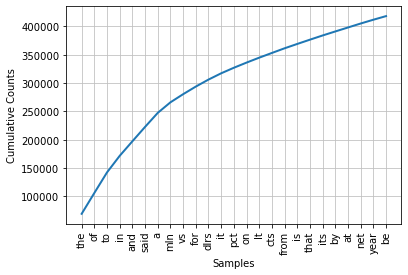

<AxesSubplot:xlabel='Samples', ylabel='Cumulative Counts'>

In [10]:
fd_1.plot(25, cumulative=True)

What are the most frequent words in terms of document frequency?
Here we are going to count how many documents a word appears in, which is referred to as document frequency.
Instead of writing nested FOR loops to count the document frequency for each word,
we can use  <font color="blue">FreqDist()</font> jointly with  <font color="blue">set()</font> as follows:
1. Apply  <font color="blue">set()</font> to each Reuters article to generate a set of unique words in the article and save all sets in a list
```python
    [set(value) for value in tokenized_reuters.values()]
```
2. Similar to what we have done before, we put all the words in a list using  <font color="blue">chain.from_iterable</font> and past
it to  <font color="blue">FreqDist</font>.

The first step makes sure that each word in an article appears only once, thus the total number of 
times a word appears in all the sets is equal to the number of documents containing that word.

In [11]:
words_2 = list(chain.from_iterable([set(value) for value in tokenized_reuters.values()]))
fd_2 = FreqDist(words_2)
fd_2.most_common(25)

[('of', 7621),
 ('the', 6950),
 ('to', 6911),
 ('said', 6784),
 ('and', 6761),
 ('in', 6580),
 ('a', 6222),
 ('lt', 6069),
 ('for', 5415),
 ('mln', 4845),
 ('it', 4788),
 ('dlrs', 4193),
 ('from', 4006),
 ('on', 3987),
 ('its', 3761),
 ('is', 3569),
 ('by', 3511),
 ('year', 3416),
 ('at', 3392),
 ('with', 3253),
 ('pct', 3212),
 ('cts', 3068),
 ('inc', 3017),
 ('vs', 2982),
 ('be', 2927)]

What you will find is that the majority of the most frequent words according to their document frequecy are still functional words.
Therefore, the next step is to remove all the stopwords.

#### Ignoring Stopwords
As discussed in section 3 of chapter 1, we often remove function words from the text completely for most text analysis tasks.
Instead of using the built-in stopword list of NLTK, we use a much rich stopword list that has been downloaded in Chapter 2.

In [12]:
stopwords = []
with open('data/stopwords_en.txt') as f:
    stopwords = f.read().splitlines()

In [13]:
tokenized_reuters_1 = {}
for fileid in reuters.fileids():
    tokenized_reuters_1[fileid] = [w for w in tokenized_reuters[fileid] if w not in stopwords]

The list comprehension 
```python
    [w for w in tokenized_reuters[fileid] if w not in stopwords]
```
says: For each word in each Reuters article, keep the word if the word is not contained in the stopword list.

Checking for membership of a value in a list takes time proportional to the list's length in the average and worst cases. 
It causes the above code to run quite slow as we need to do the check for every word in each Reuters article
and the size of the stopword list is large.
However, if you have hashable items, which means both the item order and duplicates are disregarded, 
Python `set` is better choice than `list`. The former runs much faster than the latter in terms of searching
a large number of hashable items. Indeed, `set` takes constant time to check the membership.
Let's try converting the stopword list into a stopword set, then search to remove all the stopwords.
Please also note that if you try to perform iteration, `list` is much better than `set`.

In [14]:
stopwordsSet = set(stopwords)
for fileid in reuters.fileids():
    tokenized_reuters[fileid] = [w for w in tokenized_reuters[fileid] if w not in stopwordsSet]

In the above stopping process, 481 stopwords have been removed from the vocabulary. You might wonder what those removed words are. It is quite easy to check those words by differentiating the vocabulary before and after stopping.

In [15]:
words_3 = list(chain.from_iterable(tokenized_reuters.values()))
fd_3 = FreqDist(words_3)
list(vocab - set(fd_3.keys()))

['little',
 'sent',
 'currently',
 'specifying',
 'hers',
 'whenever',
 'tends',
 'sometimes',
 'somewhat',
 'alone',
 'either',
 'fifth',
 'anywhere',
 'shall',
 'even',
 'always',
 'very',
 'y',
 'our',
 'possible',
 'via',
 'sometime',
 'his',
 'okay',
 'taken',
 'hi',
 'yet',
 'must',
 'think',
 'available',
 'whole',
 'toward',
 'has',
 'just',
 'much',
 'merely',
 'allow',
 'her',
 'relatively',
 'normally',
 'seems',
 'becomes',
 'awfully',
 'different',
 'meanwhile',
 'became',
 'immediate',
 'how',
 'seriously',
 'none',
 'which',
 'un',
 'know',
 's',
 'often',
 'being',
 'probably',
 'say',
 'well',
 'nor',
 'were',
 'that',
 'zero',
 'b',
 'could',
 'better',
 'e',
 'latter',
 'see',
 'among',
 'everyone',
 'uses',
 'having',
 'somehow',
 'appear',
 'sensible',
 'us',
 'next',
 'trying',
 'might',
 'et',
 'course',
 'former',
 'follows',
 'asking',
 'been',
 'inner',
 'far',
 'besides',
 'they',
 'changes',
 'h',
 'within',
 'them',
 'causes',
 'the',
 'believe',
 'accordin

Beside stopwords, there might some other words that occur quite often as well.

In [16]:
fd_3.most_common(10)

[('mln', 18598),
 ('dlrs', 12329),
 ('pct', 9771),
 ('lt', 8696),
 ('cts', 8308),
 ('net', 6986),
 ('year', 6687),
 ('billion', 5809),
 ('loss', 5115),
 ('company', 4593)]

Before we decide to remove those words from our vocabulary, it might be worth checking what 
those words mean and the context of those words. Fortunately NLTK provides a `concordance`
function in the `nltk.text` module. A concordance view shows us every occurrence of a given 
word, together with the corresponding context. For example,

In [17]:
nltk.Text(reuters.words()).concordance('mln')

Displaying 25 of 18623 matches:
e U . S . Has said it will impose 300 mln dlrs of tariffs on imports of Japanes
. It also said that each year 1 . 575 mln tonnes , or 25 pct , of China ' s fru
it output are left to rot , and 2 . 1 mln tonnes , or up to 30 pct , of its veg
ergy supplies in the year 2000 to 550 mln kilolitres ( kl ) from 600 mln , they
to 550 mln kilolitres ( kl ) from 600 mln , they said . The decision follows th
totalled 9 , 595 tonnes , worth 6 . 9 mln dlrs FOB , plus 184 . 3 mln rupiah fo
rth 6 . 9 mln dlrs FOB , plus 184 . 3 mln rupiah for rubber delivered locally ,
thern Territory at a cost of about 21 mln dlrs . The mine , to be known as the 
umitomo last August agreed to pay 500 mln dlrs for a 12 . 5 pct limited partner
 . It reported a net loss of 976 . 38 mln pesos in the year ending December 198
ld acquire Atlas ' total loans of 275 mln dlrs , to be repaid by the mining com
increase in authorised capital to 175 mln shares from 125 mln at a general meet
ed capit

In [18]:
nltk.Text(reuters.words()).concordance('net')

Displaying 25 of 6989 matches:
ndesbank is effectively withdrawing a net 8 . 1 billion marks from the market w
d world copper prices . It reported a net loss of 976 . 38 mln pesos in the yea
nding December 1986 , compared with a net loss of 1 . 53 billion in 1985 . The 
 U . S .- based bank , said it made a net loss of just over six mln crowns in 1
ng program , reported a 198 mln franc net loss , after 187 mln francs in provis
plant , compared with a 250 mln franc net profit in 1985 . VIEILLE MONTAGNE REP
REPORTS LOSS , DIVIDEND NIL 1986 Year Net loss after exceptional charges 198 ml
on francs vs 20 . 20 billion Proposed net dividend on ordinary shares nil vs 11
ently reported first - half 1986 / 87 net fell to 15 . 02 mln dlrs from 17 . 09
eso sales in 1985 . It said unaudited net profit was in the neighbourhood of 70
id in a statement that parent company net profit last year will rise from the 7
 DSM & lt ; DSMN . AS > said its 1986 net profit rose to 412 mln guilders from 
ARCH INC 

After reviewing those words, you might also want to remove them from the vocabulary. We will leave it as an excersie for you to do on your own.

#### Remove Less Frequent Words
If the most common words do not benefit the downstream text analysis tasks, except for contributing noises,
how about the words that occur once or twice?
Here another interesting statistic to look at is the frequency of the frequencies of word types in a given corpus.
We would like to see how many words appear only once, how many words appear twice, how many
words appear three times, and so on.

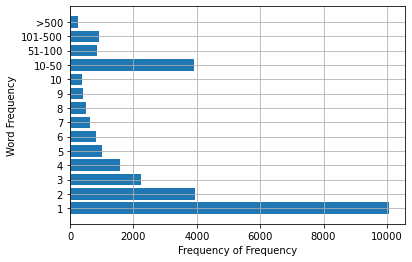

In [19]:
ffd = FreqDist(fd_3.values())
from pylab import *
y = [0]*14
for k, v in ffd.items():
     if k <= 10:
        y[k-1] = v
     elif k >10 and k <= 50:
        y[10] =  y[10] + v
     elif k >50 and k <= 100:
        y[11] =  y[11] + v
     elif k > 100 and k <= 500:
        y[12] =  y[12] + v
     else:
        y[13] =  y[13] + v
x = range(1, 15) # generate integer from 1 to 14
ytks =list(map(str, range(1, 11))) # covert a integer list to a string list
ytks.append('10-50')
ytks.append('51-100')
ytks.append('101-500')
ytks.append('>500')
barh(x,y, align='center')
yticks(x, ytks)
xlabel('Frequency of Frequency')
ylabel('Word Frequency')
grid(True)

The horizontal bar chart generated above shows how many word types occur with a certain frequency.
There are 241 types occurring over 500 times and therefore individually accounting for about 1% of
the vocabulary. 
However, on the other extreme, more than one-third of the word types occur only once in the Reuters corpus.
Note that the majority of word types occur quite infrequently given the size of the whole corpus (i.e., 721,371 word tokens):
about 78% of the word types occur 10 times or less.
Similarly, you can also look at the bar chart based on the document frequency. Try it by yourself!

Let's further remove those words that occur only once. 
To get those words, you can write the code like
```python
    lessFreqWords = set([k for k, v in fdist.items() if v < 2])
```
or choose to use `hapaxes()` function.

In [20]:
lessFreqWords = set(fd_3.hapaxes())

def removeLessFreqWords(fileid):
    return (fileid, [w for w in tokenized_reuters[fileid] if w not in lessFreqWords])

#pool = mp.Pool(4)
#tokenized_reuters = dict(pool.map(removeLessFreqWords, reuters.fileids()))

In [21]:
tokenized_reuters = dict(removeLessFreqWords(fileid) for fileid in reuters.fileids())

Now, you should have a pretty clean set of Reuters articles, each of which is stored as a list of word tokens. Let's further print out some statistics that summarize this corpus.

In [22]:
import numpy as np
words = list(chain.from_iterable(tokenized_reuters.values()))
vocab = set(words)
print ("Vocabulary size: ",len(vocab))
print ("Total number of tokens: ", len(words))
print ("Lexical diversity: ", lexical_diversity)
print ("Total number of articles:", len(tokenized_reuters))
lens = [len(value) for value in tokenized_reuters.values()]
print ("Average document length:", np.mean(lens))
print ("Maximun document length:", np.max(lens))
print ("Minimun document length:", np.min(lens))
print ("Standard deviation of document length:", np.std(lens))

Vocabulary size:  17405
Total number of tokens:  711388
Lexical diversity:  45.614140546729644
Total number of articles: 10788
Average document length: 65.94252873563218
Maximun document length: 705
Minimun document length: 0
Standard deviation of document length: 65.72077368245223


It is interesting that the minimun document length is 0. There must be some Reuters articles that are extremely short, after tokenization and stopping, there are no words left. Can you check those documents to see what they look like?

## Building Vector Representation

After text pre-processing has been completed, each individual document needs to be transformed into 
some kind of numeric representation that can be input into most NLP and text mining algorithms.
For example, classification algorithms, such as Support Vector Machine, can only take data in a 
structured and numerical form. They do not accept free languge text.
The most popular structured representation of text is the vector-space model, which represents text
as a vector where the elements of the vector indicate the occurence of words within the text.
The vector-space model makes an implicit assumption that 
the order of words in a text document are not as
important as words themselves, and thus disregarded.
This assumpiton is called [**Bag-of-words**](https://en.wikipedia.org/wiki/Bag-of-words_model).

Given a set of documents and a pre-defined list of words appearing 
in those documents (i.e., a vocabulary), you can compute a vector representation for each document.
This vector representation can take one of the following three forms:
* a binary representation,
* an integer count,
* and a float-valued weighted vector.

To highlight the difference among the three approaches, we use a very simple example as follows:
```
    document_1: "Data analysis is important."
    document_2: "Data wrangling is as important as data analysis."
    document_3: "Data science contains data analysis and data wrangling."
```
The three documents contain 20 tokens and 9 unique words.
Those unique words are sorted alphabetically with total counts:
```
     'analysis': 3,
     'and': 1,
     'as': 2,
     'contains': 1,
     'data': 6,
     'important': 2,
     'is': 2,
     'science': 1,
     'wrangling': 2
```
Given the vocabulary above, 
both the binary and the integer count vectors are easy to compute.
A binary vector stores 1s for the word that appears in a document and 0s for the other words in
the vocabulary,
whereas a count vector stores the frequency of each word appearing in the document.
Thus, the binary vector representations for the three documents above are
   
   ||'analysis'|'and'|'as'|'contains'|'data'|'important'|'is'|'science'|'wrangling'|
   |-|-|-|-|-|-|-|-|-|
   |document 1:|1|0|0|0|1|1|1|0|0|
   |document 2:|1|0|1|0|1|1|1|0|1|
   |document 3:|1|1|0|1|1|0|0|1|1|

The count vector representations for the same documents would look as follows:

   ||'analysis'|'and'|'as'|'contains'|'data'|'important'|'is'|'science'|'wrangling'|
   |-|-|-|-|-|-|-|-|-|
   |document 1:|1|0|0|0|1|1|1|0|0|
   |document 2:|1|0|2|0|2|1|1|0|1|
   |document 3:|1|1|0|1|3|0|0|1|1|

Instead of using the two vector representations above, 
most existing text analysis algorithms, like document classification and information retrieval, 
prefer representing documents as weighted vectors.
The raw term frequency is often replaced with a weighted term frequency
that indicates how important a word is in a particular document.
There are many different term weighting schemes online.
To store each document as a weighted vector, we first need to choose a weighting scheme. 
The most popular scheme is the TF-IDF weighting approach. 
TF-IDF stands for term frequency-inverse document frequency. 
The term frequency for a word is the number of times the word appears in a document. 
In the preceding example, the term frequency in Document 2 for “data” is 2, since it appears twice in the document. Document frequency for a word is the number of documents that contain the word; 
it would also be 3 for “data” in the collection of the three preceding documents. 
The Wikipidia entry on [TF-IDF](https://en.wikipedia.org/wiki/Tf%E2%80%93idf) lists 
a number of variants of TF-IDF. 
One variant is reproduced here
$$tf\cdot idf(w,d) = tf(w, d) * idf(w)$$

where 

$$tf(w,d)\,=\, \sum_{i}^{|d|} 1_{w = w_{d,i}}$$
and
$$idf(w) = log\left(\frac{|D|}{|d \in D: w \in d |}\right)$$

The assumption behind TF-IDF is that words with high term frequency should receive high weight unless they also have high document frequency. 
Stopwords are the most commonly occurring words in the English language. They often occur many times within a single document, but they also occur in nearly every document. 
These two competing effects cancel out to give them low weights,
as those very common words carry very little meaningful information about the actual contents of the document.
Therefore, the TF-IDF weights for stopwords are almost always 0.
With the TF-DF formulas above,
the weighted vector representations for the example documents are computed as

||'analysis'|'and'|'as'|'contains'|'data'|'important'|'is'|'science'|'wrangling'|
   |-|-|-|-|-|-|-|-|-|
   |document 1:|0|0|0|0|0|0.176|0.176|0|0|
   |document 2:|0|0|0.954|0|0|0.176|0.176|0|0.176|
   |document 3:|0|0.477|0|0.477|0|0|0|0.477|0.176|

Given the cleaned up Reuters documents, how can we generate those vectors for each documents? 
Unfortunately, NLTK does not implement methods that directly produce those vectors.
Therefore, we will either write our own code to compute them or appeal to other data analysis libraries.
Here we are going to use [scikit-learn](http://scikit-learn.org/stable/index.html), an open source machine 
learning library for Python.
If you use Anaconda, you should already have scikit-learn installed, otherwise you will need to 
[install it](http://scikit-learn.org/stable/install.html) by following the instruction on its official website.

Although scikit-learn features various classification, regression and clustering algorithms
we are particularly interested in its feature extraction module, [sklearn.feature_extraction](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.feature_extraction).
This module is often used to "extract features in a format supported by machine learning algorithms from datasets consisting of formats such as text and image." Please refer to its documentation on text feature extraction,
section 4.2.3 of [Feature Extraction](http://scikit-learn.org/stable/modules/feature_extraction.html#text-feature-extraction). We will demonstrate the usage of the following two classes:
* [CountVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html#sklearn.feature_extraction.text.CountVectorizer): It converts a collection of text documents to a matrix of token counts. 
* [TfidfVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html#sklearn.feature_extraction.text.TfidfVectorizer):
It converts a collection of raw documents to a matrix of TF-IDF features.

### Creating Count Vectors
Let's start with generating the count vector representation for each Reuters document.
Initialise the "CountVector" object: since we have pre-processed all the Reuters documents, 
the parameters, "tokenizer", "preprocessor" and "stop_words" are set to their default value, i.e., None.

In [23]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(analyzer = "word") 

Next, transform Reuters articles into feature vectors. `fit_transform` does two things: First, it fits the model and learns the vocabulary; second it transforms the text data into feature vectors. 
Please note the input to `fit_transform` should be a list of strings. 
Since we have stored each tokenised article as a list of words, we concatenate all the words in the list and separate
them with white spaces. 
The following code will do that:
```python
[' '.join(value) for value in tokenized_reuters.values()]
```
Then, we input this list of strings into `fit_transform`,

In [24]:
data_features = vectorizer.fit_transform([' '.join(value) for value in tokenized_reuters.values()])
print (data_features.shape)

(10788, 17405)


The shape of document-by-word matrix should be 10788 * 17403. 
However, in order to save such a matrix in memory but also to speed up algebraic operations on the matrix,
scikit-learn implements matrix/vector in a sparse representation.
Let's check the count vector for the first article, i.e., 'training/1684'.

In [25]:
vocab2 = vectorizer.get_feature_names()
for word, count in zip(vocab, data_features.toarray()[0]):
    if count > 0:
        print (word, ":", count)

premier : 1
quelled : 1
safeguards : 1
wk : 2
fn : 1
tka : 1
deferred : 1
strength : 1
shot : 2
burns : 1
credence : 1
efficacy : 2
pass : 1
eights : 1
suleiman : 1
declining : 1
prices : 1
petronas : 1
alp : 5
blockade : 1
surviving : 2
inquiry : 1
schlick : 1
gears : 1
licensees : 4
kdd : 2
rav : 1
walters : 1
unfavourable : 1
sitting : 1
fichtel : 1
hectare : 1
bridged : 1
geophysical : 1
huge : 1
chh : 1
participant : 1
peninsula : 1
accompany : 1
desperate : 1
systems : 1
wording : 1
divisions : 2
lexington : 1
furnaces : 2
idaho : 1
bearing : 2
signed : 1
ifg : 1
heer : 1
regionals : 2
places : 1
hovis : 1
feasibility : 1
nbc : 2
entitlements : 6
kpa : 1
thl : 1
composition : 2
advised : 2
slaughtering : 1
page : 1
compound : 4
bindings : 1
candidacies : 1
wealth : 1
nikko : 1
algemene : 1
heart : 1
biotechnology : 1
reconsiders : 3
pcri : 1
ocean : 6
zeeuw : 1
olein : 1
perelman : 1
lewis : 1
grade : 1
fuelling : 1
allowable : 1
amarillo : 1
unnoticed : 1
markdowns : 1
acquisito

Another way to get the count list above is to use `FreqDist`.

In [26]:
FreqDist(tokenized_reuters['training/1684'])

FreqDist({'erc': 5, 'partnership': 4, 'shares': 3, 'stake': 2, 'international': 2, 'parsow': 2, 'investment': 2, 'pct': 2, 'common': 2, 'stock': 2, ...})

Note that the vocabulary you just got with `vectorizer.get_feature_names()`  shoud be exactly the same
as the one you got in section 1. 

In [27]:
list(vocab-set(vocab2))

[]

### Creating TF-IDF Vectors
Similar to the use of `CountVector`, we first initialise a `TfidfVectorizer` object by only specifying 
the value of "analyzer", and then covert the Reuters data into a list of strings, each of which corresponds
to a Reuters articles.

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(analyzer = "word")
tfs = tfidf.fit_transform([' '.join(value) for value in tokenized_reuters.values()])
tfs.shape

(10788, 17405)

Let's print out the weighted vector for the first document.

In [29]:
vocab = vectorizer.get_feature_names()
for word, weight in zip(vocab, tfs.toarray()[0]):
    if weight > 0:
        print (word, ":", weight)

accounting : 0.03823573956083697
action : 0.030603764289874845
advantage : 0.04391485102902249
alleged : 0.08925588860591271
american : 0.027671248222558485
analyst : 0.03471741353124607
april : 0.02086707378950726
asia : 0.04378065508085651
asian : 0.08810340898938152
asked : 0.030564385982879205
association : 0.0313980308290177
australia : 0.07291866639121262
australian : 0.0370355730038719
awaiting : 0.04884195744744512
aware : 0.04594830300556613
barriers : 0.04351983642267239
beef : 0.042029101616418464
biggest : 0.03991322078154931
billion : 0.09865213113601572
block : 0.040717718076342294
boost : 0.06987133960415567
broker : 0.04594830300556613
budget : 0.03324005271643142
business : 0.02660777787626334
businessmen : 0.1810265552641015
button : 0.1325939006398515
call : 0.036789608460336125
canberra : 0.06349483197359565
capel : 0.05073855595832049
capitals : 0.05671644441441702
centred : 0.055902460674511205
chairman : 0.027041992100925547
chief : 0.03295678051366057
coal : 0.0

So now we have converted all the Reuters articles into feature vectors. 
We can use those vectors to, for example,
* compute the similarity between two articles, 
* search articles for a given query
* do other advance text analysis, such as document classification and clustering.

Assume that we have a new document, how can we get its TF-IDF vector.
We do this by using the transform function as follows.
We have randomly chosen a sentence from 
[a recent Reuters news](http://www.reuters.com/article/us-usa-election-idUSKCN0W346T).

In [31]:
str = """
the former secretary of state hoped to win enough states to take a big step toward wrapping up her nomination 
fight with a democratic senator from Vermont.
"""
response = tfidf.transform([str])
for col in response.nonzero()[1]:
    print (vocab[col], ' - ', response[0, col])

win  -  0.307399276859104
vermont  -  0.4040204786477111
step  -  0.25696902690642953
states  -  0.17542070972270207
state  -  0.18734841995701546
senator  -  0.32522928223627556
secretary  -  0.20107422757443014
nomination  -  0.39136988850775073
hoped  -  0.2667815869522921
fight  -  0.3013242256926447
democratic  -  0.2923711237015126
big  -  0.252077968138518


Note that the text above is not included in the trained TF-IDF model with the 'transform' function, unless the `fit_transform` function is called,

Both `CountVectorizer` and `TfidfVectorizer` come with their own options to automatically do pre-processing, tokenization, and stop word removal -- for each of these, instead of using their default value (i.e., None),
we could customise the two vectorizer classes by either using a built-in method or specifying our own function.
See the function documentation for more details.
However, we wanted to write our own function for clean the text data in this chapter to show you how 
it's done step by step.

## Saving Pre-processed Text to a File
The pre-processed text needs to be saved in a proper format so that it can be easily used by the downstream analysis algorithm. There are a couple of ways of dumping the pre-processed text data into txt files. 
For example, use one txt file to store the tokenized documents. The tokens in a document are stored in one row in the txt file, and are separated with a given delimiter, e.g., whitespace. In this case, the downstream text analyser needs to re-construct the vocabulary.

In [32]:
out_file = open("./reuters_1.txt", 'w')
for d in tokenized_reuters.values():
    out_file.write(' '.join(d) + '\n')
out_file.close()

You can also save vocabulary in a separate file, and assign a fixed integer id to each word in the vocabulary. What text analysers usually do is to use the index of each word in the vocabulary as its integer id.
Given the vocabulary, each document can be represented as a sequence of integers that correspond to the tokens,
or in the following sparse form:
```
    word_index:word count
```
for example,

In [33]:
out_file = open("./reuters_2.txt", 'w')
vocab = list(vocab)

vocab_dict = {}
i = 0
for w in vocab:
    vocab_dict[w] = i
    i = i + 1

for d in tokenized_reuters.values():
    d_idx = [vocab_dict[w] for w in d]
    for k, v in FreqDist(d_idx).items():
        out_file.write("{}:{} ".format(k,v))
    out_file.write('\n')
out_file.close()

## Extracting Other Features

It is common for most text analysis tasks to treat documents as bags-of-words, which can significantly simplify the inference procedure of text analysis algorithms. 
However, things always have pros and cons. 
The bag-of-words representation loses lots of information encoded in either syntax or word order (i.e., dependencies between adjacent words in sentences.). 
For example, representing a document as a collection of unigrams effectively disregards any word order dependence,
which fails to capture phrases and multi-word expressions. A similar issue has been mentioned in section 2.1. of Chapter 2. 
In this section, we are going to show you how to
* use Part-of-Speeching (POS) tagging to extract specific word groups, such as all nouns, verbs, etc.,
* extract n-grams,
*  and extract collocations

These features can be further used to enrich the representation of a document.

### Extracting Nouns and Verbs
It is easy for human to tell the difference between nouns, verbs, 
adjectives and adverbs, as we have learnt them back in elementary school.
However, how can we automatically classify words into their parts of speech (i.e., lexical categories or word classes) 
and label them accordingly with computer program? 
This section is not going to discuss how to determine the category of a word from a linguistic perspective.
Instead it demonstrates the use of some existing POS taggers to extract words in a specific lexical category.
It has been proven that words together with their part-of-speech (POS) are quite useful for many language processing tasks. 

In NLP, the process of labelling words with their corresponding part-of-speech (POS) tags is known as [POS tagging](https://en.wikipedia.org/wiki/Part-of-speech_tagging).
A POS tagger processes a sequence of words and attaches a POS tag to each word based on both its definition and its context. There are many POS taggers available online, such as [Sandford POS tagger](http://nlp.stanford.edu/software/tagger.shtml). 
We are going to use the one implemented by NLTK.

In [37]:
example_sent = 'A POS tagger processes a sequence of words and attaches a POS tag to each \
word based on both its definition and its context'
text = nltk.word_tokenize(example_sent)
tagged_sent = nltk.tag.pos_tag(text)
print(tagged_sent)

[('A', 'DT'), ('POS', 'NNP'), ('tagger', 'NN'), ('processes', 'VBZ'), ('a', 'DT'), ('sequence', 'NN'), ('of', 'IN'), ('words', 'NNS'), ('and', 'CC'), ('attaches', 'VBZ'), ('a', 'DT'), ('POS', 'NNP'), ('tag', 'NN'), ('to', 'TO'), ('each', 'DT'), ('word', 'NN'), ('based', 'VBN'), ('on', 'IN'), ('both', 'DT'), ('its', 'PRP$'), ('definition', 'NN'), ('and', 'CC'), ('its', 'PRP$'), ('context', 'NN')]


If you are seeing these tags for the first time, you will wonder what these tags mean. 
You can find the specification of all the tags [here](https://www.ling.upenn.edu/courses/Fall_2003/ling001/penn_treebank_pos.html). 
NLTK provides documentation for each tag, which can be queried using the tag, e.g., 

In [40]:
print(nltk.help.upenn_tagset('NNP'))
print(nltk.help.upenn_tagset('IN'))
print(nltk.help.upenn_tagset('PRP$'))

NNP: noun, proper, singular
    Motown Venneboerger Czestochwa Ranzer Conchita Trumplane Christos
    Oceanside Escobar Kreisler Sawyer Cougar Yvette Ervin ODI Darryl CTCA
    Shannon A.K.C. Meltex Liverpool ...
None
IN: preposition or conjunction, subordinating
    astride among uppon whether out inside pro despite on by throughout
    below within for towards near behind atop around if like until below
    next into if beside ...
None
PRP$: pronoun, possessive
    her his mine my our ours their thy your
None


The example sentence has been processed by `pos_tag` into a list of tuples, each of which is a pair of a word and its POS tag. We see that 'a' is 'DT', a determiner; 'its' is 'PRP$', a possessive pronoun; 'and' is 'CC', a coordinating conjunction, 'words' is 'NNS', a noun in the plural form, and so on. Note that several of the corpora included in NLTK have been tagged for their POS. Please click [here](http://www.nltk.org/howto/corpus.html#tagged-corpora) to see how to access those tagged corpora.
Here is an example of using the `tagged_words` function to retrieve all words in Brown corpus with their tags.

In [42]:
nltk.corpus.brown.tagged_words()

[('The', 'AT'), ('Fulton', 'NP-TL'), ...]

Please note that the collection of tags is known as a tag set. 
There are many different conventions for tagging words.
Therefore, tag sets can vary among different tasks.
What we used above is the Penn Treebank tag set.
Let's change the tag set to the Universal POS tag set, and print the Brown corpus again.
You will find different tags are used.

In [44]:
nltk.corpus.brown.tagged_words(tagset='universal')

[('The', 'DET'), ('Fulton', 'NOUN'), ...]

If you would like to learn more about POS tagging, please refer to [1].

Given the tagged text, you can easily identify all the nouns, verbs, etc.
Nouns generally refer to people, places, things, or concepts, e.g., Monash, Melbourne, university, data, and science. 
Nouns can appear after determiners and adjectives, and can be the subject or object of the verb.
Now how can we extract all the nouns from a text?
Assume we use the Penn Treebank tag set.
Here are all the tags for nouns:
```
    NN    Noun, singular or mass
    NNS   Noun, plural
    NNP   Proper noun, singular
    NNPS  Proper noun, plural
```
It is not hard to see all the tags above start with 'NN'.
Thus, we can iterate over all the words and check if their tag string starts with 'NN'.

Similarly, you will find that all the verb tags start with 'VB', see
```
    VB	Verb, base form
    VBD   Verb, past tense
    VBG   Verb, gerund or present participle
    VBN   Verb, past participle
    VBP   Verb, non-3rd person singular present
    VBZ   Verb, 3rd person singular present
```
Thus,

In [45]:
all_verbs = [w for w,t in tagged_sent if t.startswith('VB')]
all_verbs

['processes', 'attaches', 'based']

Unfortunately, the Reuters corpus that we have been using, has no built-in POS tags. But you can get sentences from Reuters corpus, and then you can get the POS tags.

### Extracting N-grams and Collocations

Besides unigrams that we have been working on so far,
N-grams of texts are also extensively used in various text analysis tasks.
They are basically contiguous sequences of `n` words from a given sequence of text.
When computing the n-grams you typically move a fixed size window of size n
words forward.
For example, for the sentence
"Laughter is like a windshield wiper."
if N = 2 (known as bigrams), the n-grams would be:
```
    Laughter is 
    is like 
    like a 
    a windshield 
    windshield wiper
```
So you have 5 bigrams in this case. Notice that the generative process above
essentially moves one word forward to generate the next bigram.
If N = 3 (known as trigrams), the n-grams would be:
```
    Laughter is like 
    is like a 
    like a  windshield
    a  windshield wiper
```
What are N-grams used for? They can be used to build n-gram language model that
can be further used for speech recognition, spelling correction, entity detection, etc.
In terms of text mining tasks, n-grams is used for developing features for 
classification algorithms, such as SVMs, MaxEnt models, Naive Bayes, etc.
The idea is to expand the unigram feature space with n-grams.
But please notice that
the use of bigrams and trigrams in your feature space may not necessarily yield significant performance
improvement. The only way to know this is to try it! 
Extracting from a text a list of n-gram can be easily accomplished with function `ngram()`:

In [46]:
from nltk.util import ngrams
bigrams = ngrams(reuters.words(), n = 2)
fdbigram = FreqDist(bigrams)

In [47]:
fdbigram.most_common()

[((',', '000'), 10266),
 (("'", 's'), 9220),
 (('lt', ';'), 8693),
 (('&', 'lt'), 8688),
 (('.', 'The'), 8530),
 (('said', '.'), 7888),
 (('of', 'the'), 6803),
 (('in', 'the'), 6487),
 (('U', '.'), 6350),
 (('.', 'S'), 5833),
 (('S', '.'), 5459),
 (('1', '.'), 4414),
 ((',', 'the'), 4296),
 (('mln', 'dlrs'), 4192),
 (('said', 'it'), 4003),
 (('mln', 'vs'), 3916),
 (('said', 'the'), 3604),
 (('.', '"'), 3512),
 (('cts', 'vs'), 3209),
 (('.', '5'), 2779),
 (('for', 'the'), 2665),
 (('000', 'vs'), 2578),
 (('to', 'the'), 2465),
 (('1', ','), 2425),
 (('2', '.'), 2375),
 (('cts', 'Net'), 2179),
 (('.', '2'), 1983),
 (('the', 'U'), 1959),
 (('the', 'company'), 1941),
 (('.', '1'), 1924),
 (('on', 'the'), 1907),
 ((',', 'which'), 1896),
 (('.', '3'), 1841),
 ((',', 'and'), 1828),
 (('.', '4'), 1815),
 (('.', '6'), 1798),
 (('.', '8'), 1789),
 (('vs', 'loss'), 1746),
 (('.', '9'), 1726),
 (('.', '7'), 1719),
 (('.', 'It'), 1707),
 (('3', '.'), 1667),
 (('he', 'said'), 1633),
 (('will', 'be'),

Collocations are expressions of multiple words that commonly co-occur. 

>Finding collocations requires first calculating the frequencies of words and
their appearance in the context of other words. Often the collection of words
will then requiring filtering to only retain useful content terms. Each ngram
of words may then be scored according to some association measure, in order
to determine the relative likelihood of each ngram being a collocation. (Quoted from [here](http://www.nltk.org/_modules/nltk/collocations.html))

For example, to extract bigram collocations, we can firstly extract bigrams then get the commonly co-occurring ones by ranking the bigrams by some measures. A commonly used measure is [Pointwise Mutual Information](https://en.wikipedia.org/wiki/Pointwise_mutual_information) (PMI). The following code will find the best 100 bigrams using the PMI scores.

In [48]:
bigram_measures = nltk.collocations.BigramAssocMeasures()
finder = nltk.collocations.BigramCollocationFinder.from_words(reuters.words())
finder.nbest(bigram_measures.pmi, 50)

[('...............', 'MAX'),
 ('11895', '2289'),
 ('11TH', 'LICENCE'),
 ('12664', '11895'),
 ('2867', '2073'),
 ('3198', '2867'),
 ('35000', '32876'),
 ('6000', 'QMS'),
 ('6834', '2292'),
 ('7289', '6834'),
 ('8440', '1409'),
 ('9009', '8440'),
 (';(', 'MWW'),
 ('ACUIRES', 'SUPERMAC'),
 ('ADELAIDE', 'STEAMSHIP'),
 ('ADVENTURE', 'Americanture'),
 ('ARMISTICE', 'ELUDES'),
 ('ARTICLES', 'HALLMARKED'),
 ('ARTILLERY', 'SHELLS'),
 ('ASPEN', 'RIBBONS'),
 ('ASSUMPTIONS', 'FLAWED'),
 ('AUTOCLAVE', 'ENGINEERS'),
 ('AVIAN', 'INFLUENZA'),
 ('Acquired', 'Immune'),
 ('Addis', 'Ababa'),
 ('Addressograph', 'Farrington'),
 ('Adventist', 'Church'),
 ('Afobaka', 'dam'),
 ('Aggregate', 'judgments'),
 ('Aghia', 'Efthymia'),
 ('Ahmad', 'Sarji'),
 ('Alfieri', 'Maserati'),
 ('Allgemeine', 'Hypothekenbank'),
 ('Almy', 'Hafild'),
 ('Alois', 'Schwietert'),
 ('Alsthom', 'Inudstrial'),
 ('Anders', 'Carlberg'),
 ('Anno', '1720'),
 ('Anwar', 'Sadat'),
 ('Aproveitamentos', 'Florestais'),
 ('Arie', 'Guldemond'),
 ('Ar

The `collocations` module implements a number of measures to score collocations or other associations. 
They include Student's t test, Chi-Square, likelihood ratios, PMI and so on.
Here we used PMI scores for finding bigrams.
Please read [2] for a detailed tutorial on finding collocations with NLTK.
If you would like to know more about collocations, please refer to [3].

## Conclusion
This chapter has show you how to 
* generate vocabulary be further exploring the tokenized text with some simple statistics. 
* convert unstructured text to structured form using the bag-of-words model
* compute TF-IDF
* extract words in specific lexical categories, n-grams and collocations.

## Reference Reading Materials
1. "[Categorizaing and Tagging Words](http://www.nltk.org/book/ch05.html)", 
Chapter 5 of "Natural Language Processing with Python".
2. "[Collocations](http://www.nltk.org/howto/collocations.html)": An NTLK tutorial on how to extract collocations 📖 .
3. "[Collocations](http://nlp.stanford.edu/fsnlp/promo/colloc.pdf)": An introduction to collocation by Manning and Schutze.